In [1]:
import sys
sys.path.append('/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana')

In [2]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
import seaborn as sns
from copy import deepcopy
from useful_func_cy import *

In [3]:
# 12 cmip6 model: deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# cmip5 + cmip6
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  # current # 30 + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  # current # 30 + 20 = 50


In [4]:
deck_cmip6 = [AWICM11MR, BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CESM2WACCMFV2, CMCCCM2SR5, CNRMESM21, CNRMCM61, CNRMCM61HR, E3SM10, ECEarth3, ECEarth3Veg, FGOALSg3, GFDLCM4, CAMSCSM1, IPSLCM6ALR, INM_CM48, MPIESM12LR, MRIESM20, GISSE21G, GISSE22G, GISSE21H, MIROC6, MIROCES2L, NESM3, NorESM2MM, SAM0, TaiESM1]   #..current # 18 + 12

deck_nas_cmip6 = ['AWICM11MR', 'BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CESM2WACCMFV2', 'CMCCCM2SR5', 'CNRMESM2', 'CNRMCM61', 'CNRMCM61HR', 'E3SM10', 'ECEarth3', 'ECEarth3Veg', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'IPSLCM6ALR', 'INM_CM48', 'MPIESM12LR', 'MRIESM20', 'GISSE21G', 'GISSE21H', 'GISSE22G', 'MIROC6', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'SAM0', 'TaiESM1']

# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

#.. current model #: 18 + 12 (except: '19')
path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Oct24_revise_add_YSSAR/'

In [5]:
## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    # print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    
    output_ARRAY[deck_nas2[i]] =  load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)

    # output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Flattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']

    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-3.63_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-12.91_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.28_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.42_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.35_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-1.55_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-4.57_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-H_r2r1_hotcold(Jan)_(largestpiR2)_Sep9t

In [6]:
# import numpy as np
from scipy.stats import *

# define the curve function which you intend to fit:
def target_func_poly1(x, a, b):
    '''
    linear fit
    '''
    y = a* x + b
    return y

def target_func_poly2(x, a, b, c): 
    '''
    2d polynomial fit
    '''
    y = a* x**2 + b* x**1 + c
    return y

def target_func_expo(x, a, b, c):

    '''
    exponential fitting
    '''
    y = a * b**x + c
    return y

In [7]:
# Standard deviation of Cloud Controlling factor (Xi) and Liquid Water Path (LWP):

sigmaXi_r1 = full((len(deck2), 4), 0.0)  # Cold
sigmaXi_r2 = full((len(deck2), 4), 0.0)  # Hot
sigmaXi_ALL = full((len(deck2), 4), 0.0)  # All ("Warm" + "Cold" regimes)

sigmaalbedo_r1 = full((len(deck2)), 0.00) # Cold
sigmaalbedo_r2 = full((len(deck2)), 0.00) # Hot

sigmaLWP_r1 = full((len(deck2)), 0.0)  # Cold
sigmaLWP_r2 = full((len(deck2)), 0.0)  # Hot
sigmaLWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean as a whole

sigmaalbedo_ALL = full((len(deck2)), 0.00) # Southern Ocean as a whole

In [8]:
for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)

    # print(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI].shape)
    ## calc standard_deviation for CCFs at training period:

    sigmaXi_r1[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Cold_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Cold_PI])])
    
    sigmaXi_r2[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Hot_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Hot_PI])])
    
    sigmaXi_ALL[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][logical_or(ind_Hot_PI, ind_Cold_PI)]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][logical_or(ind_Hot_PI, ind_Cold_PI)]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][logical_or(ind_Hot_PI, ind_Cold_PI)]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][logical_or(ind_Hot_PI, ind_Cold_PI)])])
    
    
    
    sigmaLWP_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Cold_PI])
    sigmaLWP_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Hot_PI])
    sigmaalbedo_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Cold_PI])
    sigmaalbedo_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Hot_PI])
    sigmaLWP_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][logical_or(ind_Cold_PI, ind_Hot_PI)])
    sigmaalbedo_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][logical_or(ind_Hot_PI, ind_Cold_PI)])

print(sigmaXi_r1.shape)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1541: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


(50, 4)


In [9]:
# Changes of variable between 'piControl' (mean-state) and 'abrupt4xCO2' (warming period, take 121 - 140 yrs' mean of abr4x experiment)
# Cloud Controlling factor (Xi), Liquid Water Path (LWP), and global mean surface air Temperature (gmt):
delta_gmt = full(len(deck2), 0.000)

delta_SST = full((len(deck2), 2), 0.0)  # two Regimes, Cold & Hot
delta_p_e = full((len(deck2), 2), 0.0)
delta_LTS = full((len(deck2), 2), 0.0)
delta_SUB = full((len(deck2), 2), 0.0)
delta_LWP = full((len(deck2), 2), 0.0)
delta_LWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean lwp changes
delta_LWP_4050 = full((len(deck2)), 0.0)  # 40 ~ 50^oS lwp changes
delta_LWP_5085 = full((len(deck2)), 0.0)  # 50 ~ 85^oS lwp changes

# Standardized changes of variables
# Cloud Controlling factor (Xi) scaled by 'gmt', Liquid Water Path (LWP):
std_dX_r1 = full((len(deck2), 4), 0.0)  # Standard deviation of large-scale environment factors in Cold Regime
std_dX_r2 = full((len(deck2), 4), 0.0)  # Hot
std_dX_ALL = full((len(deck2), 2), 0.0)  # All ("Warm" + "Cold" regimes) for "SST" & "LTS"


dX_dTg_r1 = full((len(deck2), 4), 0.0)  # Cold
dX_dTg_r2 = full((len(deck2), 4), 0.0)  # Hot
dX_dTg_ALL = full((len(deck2), 2), 0.0)  # All ("Warm" + "Cold" regimes) for "SST" & "LTS"

delta_LWP_dTg = full((len(deck2)), 0.0)  # Southern Ocean lwp changes scaled by gmt 
delta_LWP_dTg4050 = full((len(deck2)), 0.0)  # 40 ~ 50^oS lwp changes scaled by gmt
delta_LWP_dTg5085 = full((len(deck2)), 0.0)  # 50 ~ 85^oS lwp changes scaled by gmt
delta_LWP_dTgr1 = full((len(deck2)), 0.0)  # Cold
delta_LWP_dTgr2 = full((len(deck2)), 0.0)  # Hot

delta_SST_ALL = full((len(deck2)), 0.0)
delta_LTS_ALL = full((len(deck2)), 0.0)

# Coef of LWP to Cloud controlling factors, Xis, for two regimes
# GCM values and the OBS values

stcoef_r1 = full((len(deck2), 4), 0.0)  # Cold
stcoef_r2 = full((len(deck2), 4), 0.0)  # Hot
stcoef_obs = full((4), 0.0)  # Hot Regime Only

In [10]:
from copy import deepcopy

f20yr_index = 121*12
l20yr_index = 141*12

Lat_range1 = [0, 2]   #40 - 50 
Lat_range2 = [2, 9]   #50 - 85

for i in range(len(deck_nas2)):
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)
    
    # calc changes of variables in two different regimes:
    
    # indice for 'Hot' and 'Cold' regimes corresponding to the last period
    ind_last20_Cold_abr = deepcopy(output_ind_Cold_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Cold_abr[0:f20yr_index, :, :] = False
    ind_last20_Cold_abr[l20yr_index:, :, :] = False
    ind_last20_Hot_abr = deepcopy(output_ind_Hot_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Hot_abr[0:f20yr_index, :, :] = False
    ind_last20_Hot_abr[l20yr_index:, :, :] = False
    ind_last20_All_abr = np.logical_or(ind_last20_Cold_abr, ind_last20_Hot_abr)
    
    ind_last20_Cold_PI = deepcopy(output_ind_Cold_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_Hot_PI = deepcopy(output_ind_Hot_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_All_PI = np.logical_or(ind_last20_Cold_PI, ind_last20_Hot_PI)
    
    LWP_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    LWP_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    LWP_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LWP_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LWP_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LWP_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LWP_ALL[i] = np.nanmean(area_mean(LWP_all_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_all_PI, y_range, x_range))
    delta_LWP_4050[i] = np.nanmean(latitude_mean(LWP_all_abr[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range=[-50., -40.])) - np.nanmean(latitude_mean(LWP_all_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_LWP_5085[i] = np.nanmean(latitude_mean(LWP_all_abr[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range=[-85., -50.])) - np.nanmean(latitude_mean(LWP_all_PI, y_range, x_range, lat_range=[-85., -50.]))
    delta_LWP[i, 0] = np.nanmean(area_mean(LWP_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_cold_PI, y_range, x_range))  # Cold regime
    delta_LWP[i, 1] = np.nanmean(area_mean(LWP_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_hot_PI, y_range, x_range))  # Warm regime
    # print('1:', area_mean(LWP_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range))
    # print('2:', area_mean(LWP_cold_PI[:,:,:], y_range, x_range))
    
    
    # SST.
    SST_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    SST_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    SST_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SST_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SST_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SST_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_SST[i, 0] = np.nanmean(area_mean(SST_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_cold_PI, y_range, x_range))
    delta_SST[i, 1] = np.nanmean(area_mean(SST_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_hot_PI, y_range, x_range))
    delta_SST_ALL[i] = np.nanmean(area_mean(SST_all_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_all_PI, y_range, x_range))
    
    # p - e.
    p_e_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    p_e_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    p_e_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    p_e_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_p_e[i, 0] = np.nanmean(area_mean(p_e_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_cold_PI, y_range, x_range))
    delta_p_e[i, 1] = np.nanmean(area_mean(p_e_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_hot_PI, y_range, x_range))

    # LTS.
    
    LTS_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    LTS_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    LTS_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LTS_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LTS_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LTS_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LTS[i, 0] = np.nanmean(area_mean(LTS_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_cold_PI, y_range, x_range))
    delta_LTS[i, 1] = np.nanmean(area_mean(LTS_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_hot_PI, y_range, x_range))
    delta_LTS_ALL[i] = np.nanmean(area_mean(LTS_all_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_all_PI, y_range, x_range))
    
    
    # SUB_500.
    SUB_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SUB_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SUB_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SUB_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_SUB[i, 0] = np.nanmean(area_mean(SUB_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_cold_PI, y_range, x_range))
    delta_SUB[i, 1] = np.nanmean(area_mean(SUB_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_hot_PI, y_range, x_range))
    
    # gmt.
    gmt_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['gmt'])
    delta_gmt[i] = np.nanmean(gmt_abr[f20yr_index:l20yr_index])

# print(delta_gmt)
# print(sigmaLWP_r2)
# print(sigmaLWP_ALL)
# print(delta_SUB)

In [11]:
# changes of variables;
# standardized change of Xi scaled by gmt, lwp change scaled by 'gmt':

for i in range(len(deck_nas2)):
    
    dX_dTg_r1[i, :] = (np.asarray([delta_SST[i, 0], delta_p_e[i, 0], delta_LTS[i, 0], delta_SUB[i,0]] / delta_gmt[i]).flatten()) / sigmaXi_r1[i, :]  # Cold
    dX_dTg_r2[i, :] = (np.asarray([delta_SST[i, 1], delta_p_e[i, 1], delta_LTS[i, 1], delta_SUB[i,1]] / delta_gmt[i]).flatten()) / sigmaXi_r2[i, :]  # Hot
    dX_dTg_ALL[i, :] = (np.asarray([delta_SST_ALL[i], delta_LTS_ALL[i]] / delta_gmt[i]).flatten()) / [sigmaXi_ALL[i,0], sigmaXi_ALL[i, 2]]  # All
    
    std_dX_r1[i, :] = (np.asarray([delta_SST[i, 0], delta_p_e[i, 0], delta_LTS[i, 0], delta_SUB[i,0]]).flatten()) / sigmaXi_r1[i, :]  # Cold
    std_dX_r2[i, :] = (np.asarray([delta_SST[i, 1], delta_p_e[i, 1], delta_LTS[i, 1], delta_SUB[i,1]]).flatten()) / sigmaXi_r2[i, :]  # Hot
    std_dX_ALL[i, :] = (np.asarray([delta_SST_ALL[i], delta_LTS_ALL[i]]).flatten()) / [sigmaXi_ALL[i,0], sigmaXi_ALL[i, 2]]  # All: standard deviation of CCFs

    
    delta_LWP_dTg[i] = (delta_LWP_ALL[i] / delta_gmt[i])
    delta_LWP_dTg4050[i] = (delta_LWP_4050[i] / delta_gmt[i])
    delta_LWP_dTg5085[i] = (delta_LWP_5085[i] / delta_gmt[i])
    delta_LWP_dTgr1[i] = (1000. * delta_LWP[i, 0]) / delta_gmt[i]
    delta_LWP_dTgr2[i] = (1000. * delta_LWP[i, 1]) / delta_gmt[i]

# print(dX_dTg_r1)
# print(delta_LWP_dTgr2)

In [12]:
# standardized coefficient of GCM:
coef_cold = []
intp_cold = []
coef_hot = []
intp_hot = []

for i in range(len(deck_nas2)):
    # print(output_2lrm_coef_LWP[deck_nas2[i]].shape)
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()
    a_le = output_2lrm_coef_LWP[deck_nas2[i]][1][0].copy()
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1].copy()
    a0_le = output_2lrm_coef_LWP[deck_nas2[i]][1][1].copy()
    
    coef_cold.append(array(a_lt))
    coef_hot.append(array(a_le))
    intp_cold.append(array(a0_lt))
    intp_hot.append(array(a0_le))

for j in range(len(deck_nas2)):
    # print(coef_cold[j].shape)
    # print(sigmaXi_r1[j,:].shape)
    stcoef_r1[j, :] = 1000. * coef_cold[j] * sigmaXi_r1[j, :]  # Cold
    stcoef_r2[j, :] = 1000. * coef_hot[j] * sigmaXi_r2[j, :]  # Warm
    
# print(coef_hot)
# print(stcoef_r2[:,:])

In [13]:
Coef_Warm = asarray(coef_hot)
print(Coef_Warm.shape)

(50, 4)


In [14]:
print(delta_SST_ALL)

print(delta_LTS_ALL)

[4.01145569 7.09852593 7.60172039 6.84700566 6.99909885 5.74179299
 4.02189825 4.89921326 5.6644124  5.44925104 1.69343636 6.69846144
 7.98448588 3.26810007 5.28041603 3.23863044 3.30339918 3.39194029
 4.78758013 4.771207   6.82196132 7.18605377 7.46586431 5.15629111
 5.02443171 2.44380658 2.19203977 5.34741917 2.19699526 7.61473398
 7.36796495 5.77692059 5.63340183 5.38309738 5.29970029 4.28710218
 6.6937819  3.46139309 2.49533431 2.27845572 3.51848085 2.53284544
 3.70304406 3.22514258 5.95337454 4.51328171 3.46169339 5.20319766
 1.73116845 1.86525595]
[ 1.22376877  1.6590293   1.48523072  1.12362106  1.06334438  0.75354594
  1.16411511  0.67588663  1.03640133  0.41050612  1.80665144  0.25356068
  1.08224108  0.95949784  0.88688045  1.31018248  0.62268698  1.4221437
  0.77806164  1.40806968  0.96952313  0.3004283   0.30223232  1.16666733
  1.21841791  1.15924788  1.72294188  1.78120729  1.62060914  0.7411503
 -0.72816429 -0.04566667  0.35677728  0.45309289  1.18315033  0.23400462
  0.

Text(0, 0.5, '$\\Delta LTS,\\ [K]$')

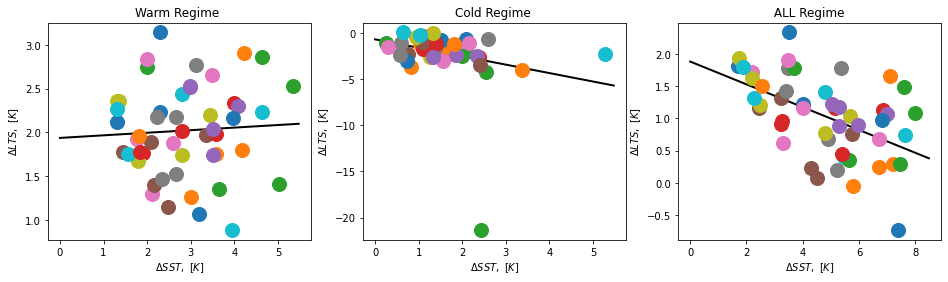

In [13]:
# Plot the relationship between \Delta LTS and \Delta SST in the Warm (Cold) regimes: 

from matplotlib import cm
fig = plt.figure(figsize = (16, 4))

# Warm Regime:
ax1 = fig.add_subplot(131)


Del_SST_Warm = []
Del_LTS_Warm = []
for i in range(len(deck_nas2)):
    
    ax1.plot(delta_SST[i, 1], delta_LTS[i, 1], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Warm.append(delta_SST[i, 1])
    Del_LTS_Warm.append(delta_LTS[i, 1])
    
x = np.arange(0, 5.5, 0.025)
Popt_TsStability_Warm, Pocv_TsStability_Warm = curve_fit(target_func_poly1, Del_SST_Warm, Del_LTS_Warm)
ax1.plot(x, x * Popt_TsStability_Warm[0] + Popt_TsStability_Warm[1], '-', c = 'k', linewidth = 2)
ax1.set_title("Warm Regime ")
ax1.set_xlabel(r"$\Delta SST,\ [K]$")
ax1.set_ylabel(r"$\Delta LTS,\ [K]$")



# Cold Regime:
ax2 = fig.add_subplot(132)

Del_SST_Cold = []
Del_LTS_Cold = []
for i in range(len(deck_nas2)):
    
    ax2.plot(delta_SST[i, 0], delta_LTS[i, 0], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Cold.append(delta_SST[i, 0])
    Del_LTS_Cold.append(delta_LTS[i, 0])
    
x = np.arange(0, 5.5, 0.025)

Popt_TsStability_Cold, Pocv_TsStability_Cold = curve_fit(target_func_poly1, Del_SST_Cold, Del_LTS_Cold)
ax2.plot(x, x * Popt_TsStability_Cold[0] + Popt_TsStability_Cold[1], '-', c = 'k', linewidth = 2)
ax2.set_title("Cold Regime ")
ax2.set_xlabel(r"$\Delta SST,\ [K]$")
ax2.set_ylabel(r"$\Delta LTS,\ [K]$")

# All Regime: "Warm" + "Cold":
ax3 = fig.add_subplot(133)

Del_SST_All = []
Del_LTS_All = []


for i in range(len(deck_nas2)): 
    
    ax3.plot(delta_SST_ALL[i], delta_LTS_ALL[i],  marker = 'o', markersize = 14, zorder = 13)
    
    Del_SST_All.append(delta_SST_ALL[i])
    Del_LTS_All.append(delta_LTS_ALL[i])

x = np.arange(0, 8.5, 0.025)

Popt_TsStability_All, Pocv_TsStability_All = curve_fit(target_func_poly1, Del_SST_All, Del_LTS_All)
ax3.plot(x, x * Popt_TsStability_All[0] + Popt_TsStability_All[1], '-', c = 'k', linewidth = 2)

ax3.set_title(" ALL Regime ")
ax3.set_xlabel(r"$\Delta SST,\ [K]$")
ax3.set_ylabel(r"$\Delta LTS,\ [K]$")

Text(0, 0.5, '$\\Delta LTS / \\Delta gmt,\\ [Std/K]$')

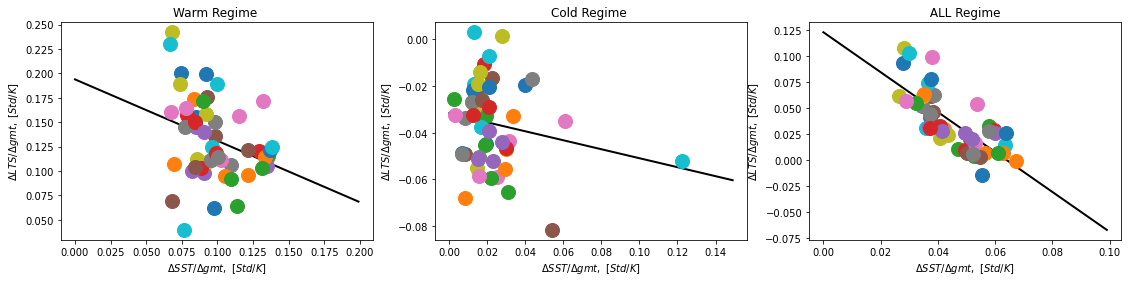

In [14]:
# Plot the relationship between d_LTS / dTg and d_SST / dTg in the Warm (Cold) regimes: 

from matplotlib import cm
fig = plt.figure(figsize = (19, 4))

# Warm Regime:
ax1 = fig.add_subplot(131)

Del_SST_Warm = []
Del_LTS_Warm = []
for i in range(len(deck_nas2)):
    
    ax1.plot(dX_dTg_r2[i, 0], dX_dTg_r2[i, 2], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Warm.append(dX_dTg_r2[i, 0])
    Del_LTS_Warm.append(dX_dTg_r2[i, 2])
    
x = np.arange(0, 0.20, 0.0010)

Popt_stdTsStability_Warm, Pocv_stdTsStability_Warm = curve_fit(target_func_poly1, Del_SST_Warm, Del_LTS_Warm)
ax1.plot(x, x * Popt_stdTsStability_Warm[0] + Popt_stdTsStability_Warm[1], '-', c = 'k', linewidth = 2)
ax1.set_title("Warm Regime ")
ax1.set_xlabel(r"$\Delta SST / \Delta gmt,\ [Std/K]$")
ax1.set_ylabel(r"$\Delta LTS / \Delta gmt,\ [Std/K]$")


# Cold Regime:
ax2 = fig.add_subplot(132)

Del_SST_Cold = []
Del_LTS_Cold = []
for i in range(len(deck_nas2)):
    
    ax2.plot(dX_dTg_r1[i, 0], dX_dTg_r1[i, 2], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Cold.append(dX_dTg_r1[i, 0])
    Del_LTS_Cold.append(dX_dTg_r1[i, 2])
    
x = np.arange(0, 0.15, 0.0010)

Popt_stdTsStability_Cold, Pocv_stdTsStability_Cold = curve_fit(target_func_poly1, Del_SST_Cold, Del_LTS_Cold)
ax2.plot(x, x * Popt_stdTsStability_Cold[0] + Popt_stdTsStability_Cold[1], '-', c = 'k', linewidth = 2)
ax2.set_title("Cold Regime ")
ax2.set_xlabel(r"$\Delta SST / \Delta gmt,\ [Std/K]$")
ax2.set_ylabel(r"$\Delta LTS / \Delta gmt,\ [Std/K]$")


# All Regime: "Warm" + "Cold":
ax3 = fig.add_subplot(133)

Del_SST_All = []
Del_LTS_All = []


for i in range(len(deck_nas2)): 
    
    ax3.plot(dX_dTg_ALL[i, 0], dX_dTg_ALL[i, 1],  marker = 'o', markersize = 14, zorder = 13)
    
    Del_SST_All.append(dX_dTg_ALL[i, 0])
    Del_LTS_All.append(dX_dTg_ALL[i, 1])

x = np.arange(0, 0.10, 0.0010)

Popt_stdTsStability_All, Pocv_stdTsStability_All = curve_fit(target_func_poly1, Del_SST_All, Del_LTS_All)
ax3.plot(x, x * Popt_stdTsStability_All[0] + Popt_stdTsStability_All[1], '-', c = 'k', linewidth = 2)

ax3.set_title(" ALL Regime ")
ax3.set_xlabel(r"$\Delta SST / \Delta gmt,\ [Std/K]$")
ax3.set_ylabel(r"$\Delta LTS / \Delta gmt,\ [Std/K]$")

In [15]:
print(Popt_TsStability_Warm)
print(Popt_TsStability_All)

[0.02946097 1.93806059]
[-0.17673795  1.88135249]


In [16]:
print(Popt_stdTsStability_Warm)
print(Popt_stdTsStability_All)

[-0.62949075  0.19385461]
[-1.92007221  0.12254477]


In [17]:
# import Zelinka's data for current CMIP5, CMIP6 models:

import json
f = open('cmip56_forcing_feedback_ecs.json','r')
data = json.load(f)

data.keys()

dict_keys(['CMIP5', 'CMIP6', 'metadata', 'provenance'])

In [18]:
print(data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD'])

-0.4903555617349872


In [19]:
# read through CMIP5 + CMIP6 :
EffCS = {}
SWCLD = {}

for i in range(len(deck_nas2)):
    
    if deck2[i]['cmip'] == 'cmip5':
        EffCS[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
        SWCLD[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']
        
    if deck2[i]['cmip'] == 'cmip6':
        
        if deck2[i]['modn'] == 'EC-Earth3':
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['SWCLD']
        
        else:
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']
        
print(SWCLD)

{'BCCESM1': 0.02229493412312672, 'CanESM5': -0.018977452095036106, 'CESM2': 0.7944544940171103, 'CESM2FV2': 0.9514166569676963, 'CESM2WACCM': 1.0476148653974426, 'CNRMESM21': 0.03116854950157273, 'GISSE21G': -0.6349416452897468, 'GISSE21H': -0.5293336034493376, 'IPSLCM6ALR': 0.14242772625686542, 'MRIESM20': 0.11843090267562513, 'MIROC6': -0.13125504312338965, 'SAM0': 0.8890847252446356, 'E3SM10': 0.7540423909074488, 'FGOALSg3': -0.731886236769336, 'GFDLCM4': 0.026291736409965426, 'CAMSCSM1': -0.7193458057599514, 'INM_CM48': -0.19398971558995093, 'MPIESM12LR': -0.6774801583907203, 'AWICM11MR': -0.309503741983036, 'CMCCCM2SR5': 0.4837074536713247, 'CESM2WACCMFV2': 0.9746100045399928, 'CNRMCM61': -0.02194159123060901, 'CNRMCM61HR': -0.09998430040627783, 'ECEarth3': 0.051233724903400765, 'ECEarth3Veg': 0.019625181024840434, 'GISSE22G': -0.8773883547213506, 'MIROCES2L': -0.34994722957890567, 'NESM3': -0.14795846385141292, 'NorESM2MM': 0.2954004485931316, 'TaiESM1': 0.5452482045562381, 'BNUE

In [20]:
k = 0
for i in range(len(deck2)):
    
    if EffCS[deck_nas2[i]] >= 4.7:
        k += 1
print(k)

8


In [22]:
# Read CMIP5/ 6 Cloud feedbacks data

import netCDF4 as nc
fn_cmip5 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP5_cld_fbks.nc'
fn_cmip6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP6_cld_fbkd_July12.nc'

# glob.glob(fn_cmip5)
f_cmip5 = nc.Dataset(fn_cmip5, 'r')
f_cmip6 = nc.Dataset(fn_cmip6, 'r')
# print(f_cmip5.variables['model'])
# print(f_cmip6.variables['model'])


# variables from Zelinka's SWfb files:
lat_mz = np.asarray(f_cmip6.variables['latitude'])
bound_lat_mz = np.asarray(f_cmip6.variables['bounds_latitude'])

lon_mz = np.asarray(f_cmip6.variables['longitude'])
bound_lon_mz = np.asarray(f_cmip6.variables['bounds_longitude'])
print(lon_mz)

# model_names:
cmip6model_nas = f_cmip6.variables['model'].long_name
cmip5model_nas = f_cmip5.variables['model'].long_name

cmip6_nas = cmip6model_nas[1:-1].split()
for i in range(len(cmip6_nas)):
    cmip6_nas[i] = cmip6_nas[i][1:-1]
    
cmip5_nas = cmip5model_nas[1:-1].split()
for i in range(len(cmip5_nas)):
    cmip5_nas[i] = cmip5_nas[i][1:-1]
# print(cmip6_nas)
# print(cmip5_nas)

model_nas = []
model_nas = np.append(cmip6_nas, cmip5_nas)
print(model_nas)

# SW_cloud_Feedback:
sw_cld_fb_mz = []

cmip6_sw_cld_fb_mz = np.asarray(f_cmip6.variables['SWCLD_fbk6_map'])
cmip5_sw_cld_fb_mz = np.asarray(f_cmip5.variables['SWCLD_fbk5_map'])

sw_cld_fb_mz = np.append(cmip6_sw_cld_fb_mz, cmip5_sw_cld_fb_mz, axis = 2)
print(sw_cld_fb_mz.shape)

# Handle nan value
sw_cld_fb_mz = np.where(sw_cld_fb_mz!=1.e+20, sw_cld_fb_mz, np.nan)
ind_nan = np.isnan(sw_cld_fb_mz)
# print(np.nonzero(ind_nan==True))  # #0

reshape_sw_cld_fb = np.transpose(sw_cld_fb_mz,(2, 0, 1))

print(reshape_sw_cld_fb.shape)
# SO_sw_cldfb = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi1+1+1),:], y_range_swcld, x_range_swcld) # -85.S ~ -40.S
SO_sw_cldfb = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -40.])
# SO_sw_cldfb_5085 = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi2+1+1),:], y_range_swcld5085, x_range_swcld) # -85.S ~ -50.S
SO_sw_cldfb_5085 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -50.])
# SO_sw_cldfb_4050 = area_mean(reshape_sw_cld_fb[:,(latsi2+1):(latsi1+1+1),:], y_range_swcld4050, x_range_swcld) # -50.S ~ -40.S
SO_sw_cldfb_4050 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-50., -40.])

print(SO_sw_cldfb)

[  1.25   3.75   6.25   8.75  11.25  13.75  16.25  18.75  21.25  23.75
  26.25  28.75  31.25  33.75  36.25  38.75  41.25  43.75  46.25  48.75
  51.25  53.75  56.25  58.75  61.25  63.75  66.25  68.75  71.25  73.75
  76.25  78.75  81.25  83.75  86.25  88.75  91.25  93.75  96.25  98.75
 101.25 103.75 106.25 108.75 111.25 113.75 116.25 118.75 121.25 123.75
 126.25 128.75 131.25 133.75 136.25 138.75 141.25 143.75 146.25 148.75
 151.25 153.75 156.25 158.75 161.25 163.75 166.25 168.75 171.25 173.75
 176.25 178.75 181.25 183.75 186.25 188.75 191.25 193.75 196.25 198.75
 201.25 203.75 206.25 208.75 211.25 213.75 216.25 218.75 221.25 223.75
 226.25 228.75 231.25 233.75 236.25 238.75 241.25 243.75 246.25 248.75
 251.25 253.75 256.25 258.75 261.25 263.75 266.25 268.75 271.25 273.75
 276.25 278.75 281.25 283.75 286.25 288.75 291.25 293.75 296.25 298.75
 301.25 303.75 306.25 308.75 311.25 313.75 316.25 318.75 321.25 323.75
 326.25 328.75 331.25 333.75 336.25 338.75 341.25 343.75 346.25 348.75
 351.2

In [21]:
print(stcoef_r2)

[[ -6.34120015  38.441917     2.1285506   -8.25854326]
 [ 21.29878431  21.62733075   1.19034813  -0.41566391]
 [-11.09420664   4.55554973   8.83743671   0.90007654]
 [-10.80037822   2.75623261  13.52443989   2.86735755]
 [-11.16008362   4.57039709   9.06012054   0.96519572]
 [  6.99662583  14.40994346   5.92539849  -1.44463181]
 [ 10.63440875  45.06506393   0.46107608  -9.4653317 ]
 [  4.66707994  44.96403036   0.35476661  -9.47096013]
 [ 46.52826398  34.66573671  -2.3489126    4.05818555]
 [ 35.51480372  27.382552     3.64721382  -2.42138249]
 [ 25.87796892  52.99129129  -3.10834235  -2.78140501]
 [ -0.33066786   5.75500319   8.21327109   1.8862291 ]
 [ -6.26515651  10.27218878  -3.00661687   3.08921213]
 [  3.67481028  12.19901061   7.58987345   1.57502817]
 [ 30.05136308  32.8336334   -0.198633    -1.85740641]
 [ 17.81388347  17.53273212  12.64158215   6.63448651]
 [  9.12863756   4.37206177  -0.32075226  -0.89807823]
 [ 21.2434168   17.35009776  14.83747821   6.3592821 ]
 [ 20.3389

Text(0, 0.5, '$\\frac{dLWP}{dSST}\\ -\\ 0.62 * \\frac{dLWP}{dLTS},\\ [g m^{-2} / std^{-1}]$')

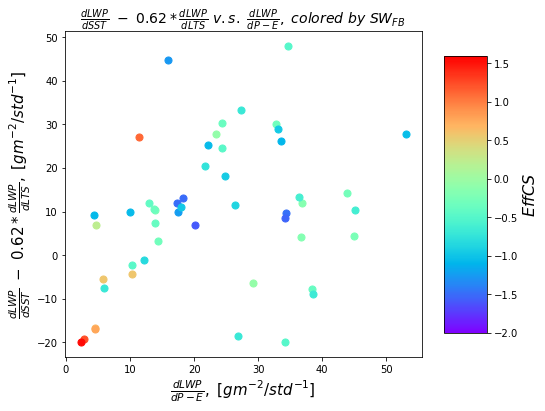

In [23]:
# Plot d_LWP/d_P - E against d_LWP/d_SST - 0.1767* d_LWP/d_LTS
from matplotlib import cm
fig = plt.figure(figsize = (8, 6))

ax4 = fig.add_subplot(111)

SW_FB_4085 = []
SW_FB_5085 = []
SW_FB_4050 = []

for i in range(len(deck2)):
    for j in range(len(SO_sw_cldfb)):
        # 50
        if (deck2[i]['modn']== model_nas[j]):
            # if (i in modelconstraintbystep1_nas):
            SW_FB_4085 = np.append(SW_FB_4085, SO_sw_cldfb[j])
            SW_FB_4050 = np.append(SW_FB_4050, SO_sw_cldfb_4050[j])
            SW_FB_5085 = np.append(SW_FB_5085, SO_sw_cldfb_5085[j])
    
    dist1 = ax4.scatter(stcoef_r2[i, 1], stcoef_r2[i, 0]- 0.63 * stcoef_r2[i, 2], c = SW_FB_4085[i], s = 50, cmap = cm.rainbow, vmin = -2.00, vmax = 1.60)  # vmin = 2.10, vmax = 5.80 vmin=-1.00, vmax =1.00
    
    # print(stcoef_r2[i, 0], stcoef_r2[i, 0] - 0.1767 * stcoef_r2[i, 2])
cb1 = fig.colorbar(dist1, ax = ax4, shrink = 0.85, aspect = 6.5)
cb1.set_label(r"$ EffCS $", fontsize = 16)

ax4.set_title(r"$\frac{dLWP}{dSST}\ -\ 0.62 * \frac{dLWP}{dLTS}\ v.s.\ \frac{dLWP}{dP-E},\ colored\ by\ SW_{FB}$", fontsize = 14)

ax4.set_xlabel(r"$\frac{dLWP}{dP-E},\ [g m^{-2} / std^{-1}]$", fontsize = 15)
ax4.set_ylabel(r"$\frac{dLWP}{dSST}\ -\ 0.62 * \frac{dLWP}{dLTS},\ [g m^{-2} / std^{-1}]$", fontsize = 15)

# plt.savefig(path6 +"dLWP_dP-E__vs__dLWP_dSST-c1*dLWP_dLTS__cbySOSWfb.jpg", bbox_inches = 'tight', dpi = 200)

Text(0, 0.5, '$SW_{FB} $')

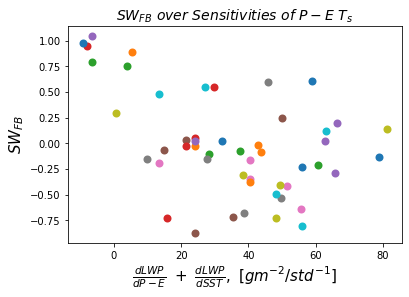

In [24]:
plt.figure()

for i in range(len(deck_nas2)):
    
    plt.scatter(stcoef_r2[i, 1] + 1.*stcoef_r2[i, 0] , SWCLD[deck_nas2[i]], linewidth = 2.)  # - 0.62 * stcoef_r2[i, 2]
    

plt.title(r"$ SW_{FB}\ over\ Sensitivities\ of\ P - E\ T_{s}$", fontsize = 14)

plt.xlabel(r"$\frac{dLWP}{dP-E}\ +\ \frac{dLWP}{dSST},\ [g m^{-2} / std^{-1}]$", fontsize = 15)  # \ -\ 0.62 * \frac{dLWP}{dLTS}
plt.ylabel(r"$SW_{FB} $", fontsize = 15)

# plt.savefig(path6 +"SWfb__vs.__dLWP_dP-E.jpg")

In [36]:
pearsonr_map_SWfb_dLWPdP_E = np.zeros((reshape_sw_cld_fb.shape[1], reshape_sw_cld_fb.shape[2]))
pvalue_map_SWfb_dLWPdP_E = np.zeros((reshape_sw_cld_fb.shape[1], reshape_sw_cld_fb.shape[2]))

SWCLD_specific_models = []
print(pearsonr_map_SWfb_dLWPdP_E.shape)

# get the SW cloud feedback for our models list:
for i in range(len(deck2)):
    for j in range(reshape_sw_cld_fb.shape[0]):
        
        if (deck2[i]['modn'] == model_nas[j]):
            
            SWCLD_specific_models.append(reshape_sw_cld_fb[j])

SWCLD_specific_models = np.asarray(SWCLD_specific_models)
# print(reshape_sw_cld_fb[61])
# print(SWCLD_specific_models[49])


# processing NaN values:
ind_false_SWCLD = np.isnan(SWCLD_specific_models)
SWCLD_withoutNaN = deepcopy(SWCLD_specific_models)
SWCLD_withoutNaN[ind_false_SWCLD] = 999

print(np.asarray(np.nonzero(ind_false_SWCLD == True)).shape)
print(SWCLD_withoutNaN[:,2, 3].shape)

# Calc the correlation coefficients map:
for k in range(reshape_sw_cld_fb.shape[1]):    
    for t in range(reshape_sw_cld_fb.shape[2]):
        
        a, b = pearsonr(stcoef_r1[:, 1], SWCLD_withoutNaN[:,k,t])
        pearsonr_map_SWfb_dLWPdP_E[k, t] = a
        pvalue_map_SWfb_dLWPdP_E[k, t] = b
    

print(pearsonr(stcoef_r1[:, 1], SWCLD_withoutNaN[:, 1, 1]))

(90, 144)
(3, 0)
(50,)
(-0.47394054608448033, 0.0005076266797617256)


In [37]:
print(pvalue_map_SWfb_dLWPdP_E)

[[6.23762461e-03 6.78096285e-03 6.06549940e-03 ... 6.15172602e-03
  7.58604621e-03 8.23429929e-03]
 [3.85141786e-04 5.07626680e-04 4.91216656e-04 ... 9.30748987e-05
  1.39421002e-04 2.66363665e-04]
 [1.88900328e-04 3.33640823e-04 2.52540228e-04 ... 3.05091198e-04
  1.19919943e-04 1.32563926e-04]
 ...
 [7.66879641e-01 7.78563814e-01 7.93019114e-01 ... 6.53605832e-01
  7.15397353e-01 7.12877899e-01]
 [9.55921346e-01 9.42321672e-01 9.75647100e-01 ... 7.50549686e-01
  8.21603836e-01 8.89063795e-01]
 [6.77973559e-01 6.57759056e-01 6.37135286e-01 ... 7.40246025e-01
  7.15902139e-01 6.96170039e-01]]


(90,) (144,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


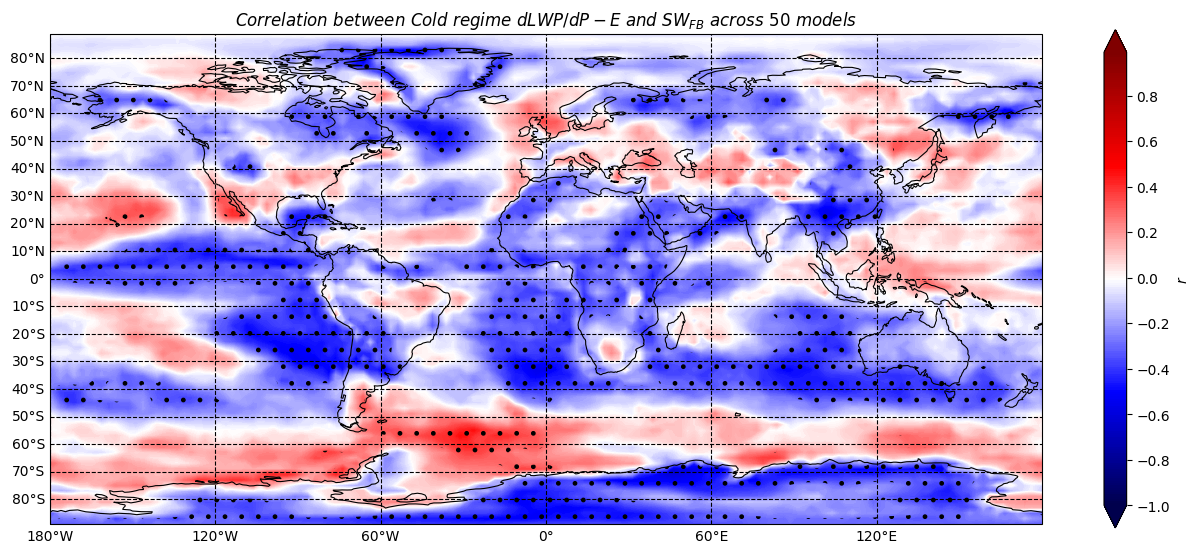

In [39]:
# Plotting the correlation map of grid specific SWCLD to 'd_LWP_d_P - E';
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from copy import deepcopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Latitude and Longitude array:
LAT = lat_mz
LON = lon_mz
cycle_pearsonr, cycle_lon = add_cyclic_point(pearsonr_map_SWfb_dLWPdP_E, coord = LON)
cycle_pvalue, cycle_lon = add_cyclic_point(pvalue_map_SWfb_dLWPdP_E, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# Propagate the 'nan' in CERES and MAC-LWP:

# Processing 'nan' in aggregated data:
# Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
# ind_false_gcm = np.isnan(Z_training_gcm)
# ind_true_gcm = np.logical_not(ind_false_gcm)

# ck_a_GCM[ind_false_gcm] = np.nan
# print(ck_a_GCM.shape)

# begin plotting:
proj = ccrs.PlateCarree()
fig5 = plt.figure(figsize=(16, 15), dpi = 100)
ax5 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax5.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-1.0, 1.0, 0.01)

contourf1 = ax5.contourf(X, Y, cycle_pearsonr, levels= clevel, cmap='seismic', extend='both')  # predict_label_LWP_PI[t_PI,:,:]

cb2 = fig5.colorbar(contourf1, ax = ax5, orientation='vertical', label = r"$ r $", extend ='both', shrink = 0.44, pad = 0.05)
c1b = ax5.contourf(X, Y, cycle_pvalue, levels= [0., 0.05, 1], zorder = 1, hatches=['.', None], alpha = 0)

ax5.set_title(r'$Correlation\ between\ Cold\ regime\ dLWP/d{P - E}\ and\ SW_{FB}\ across\ 50\ models$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax5.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Correlation_ColddLWP_dP_E_SWfb.png', bbox_inches ='tight', dpi = 100)
